# Machine downtime prediction using scikit-learn models
## 1. Data
Dataset for this is obtained from kaggle:
https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification

## 2. Evaluation
Evaluation metrics will be F1-score and Accuracy for this project.

## 3. Features
The dataset consists of 10,000 data points stored as rows with 9 columns:
  
<ul>
<li class="has-line-data" data-line-start="0" data-line-end="1">UID: unique identifier ranging from 1 to 10000</li>
<li class="has-line-data" data-line-start="1" data-line-end="2">productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number</li>
<li class="has-line-data" data-line-start="2" data-line-end="3">air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K</li>
<li class="has-line-data" data-line-start="3" data-line-end="4">process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.</li>
<li class="has-line-data" data-line-start="4" data-line-end="5">rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise</li>
<li class="has-line-data" data-line-start="5" data-line-end="6">torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.</li>
<li class="has-line-data" data-line-start="6" data-line-end="7">tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process, and a ‘machine failure’ label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.</ne failure

**Target=0 means no failure and Target=1 means failure**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("./predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0


### The dataset has no NULL values, so we simply need to make it all numerical before fitting it.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 703.3+ KB


In [4]:
for label,content in df.items():
    if pd.api.types.is_object_dtype(content):
        df[label]=content.astype("category").cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  int16  
 2   Type                     10000 non-null  int8   
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
dtypes: float64(3), int16(1), int64(4), int8(1)
memory usage: 576.3 KB


In [5]:
df.sort_values(by="UDI",inplace=True)

In [6]:
train_df=df[:8000]
test_df=df[8000:]
train_df.shape,test_df.shape

((8000, 9), (2000, 9))

In [7]:
train_df.to_csv("./train.csv",index=False)
test_df.drop(["Target"],axis=1).to_csv("./test.csv",index=False)
test_df.Target.to_csv("./test_label.csv",index=False)

## Choosing the right estimator by data analysis

In [8]:
import seaborn as sns

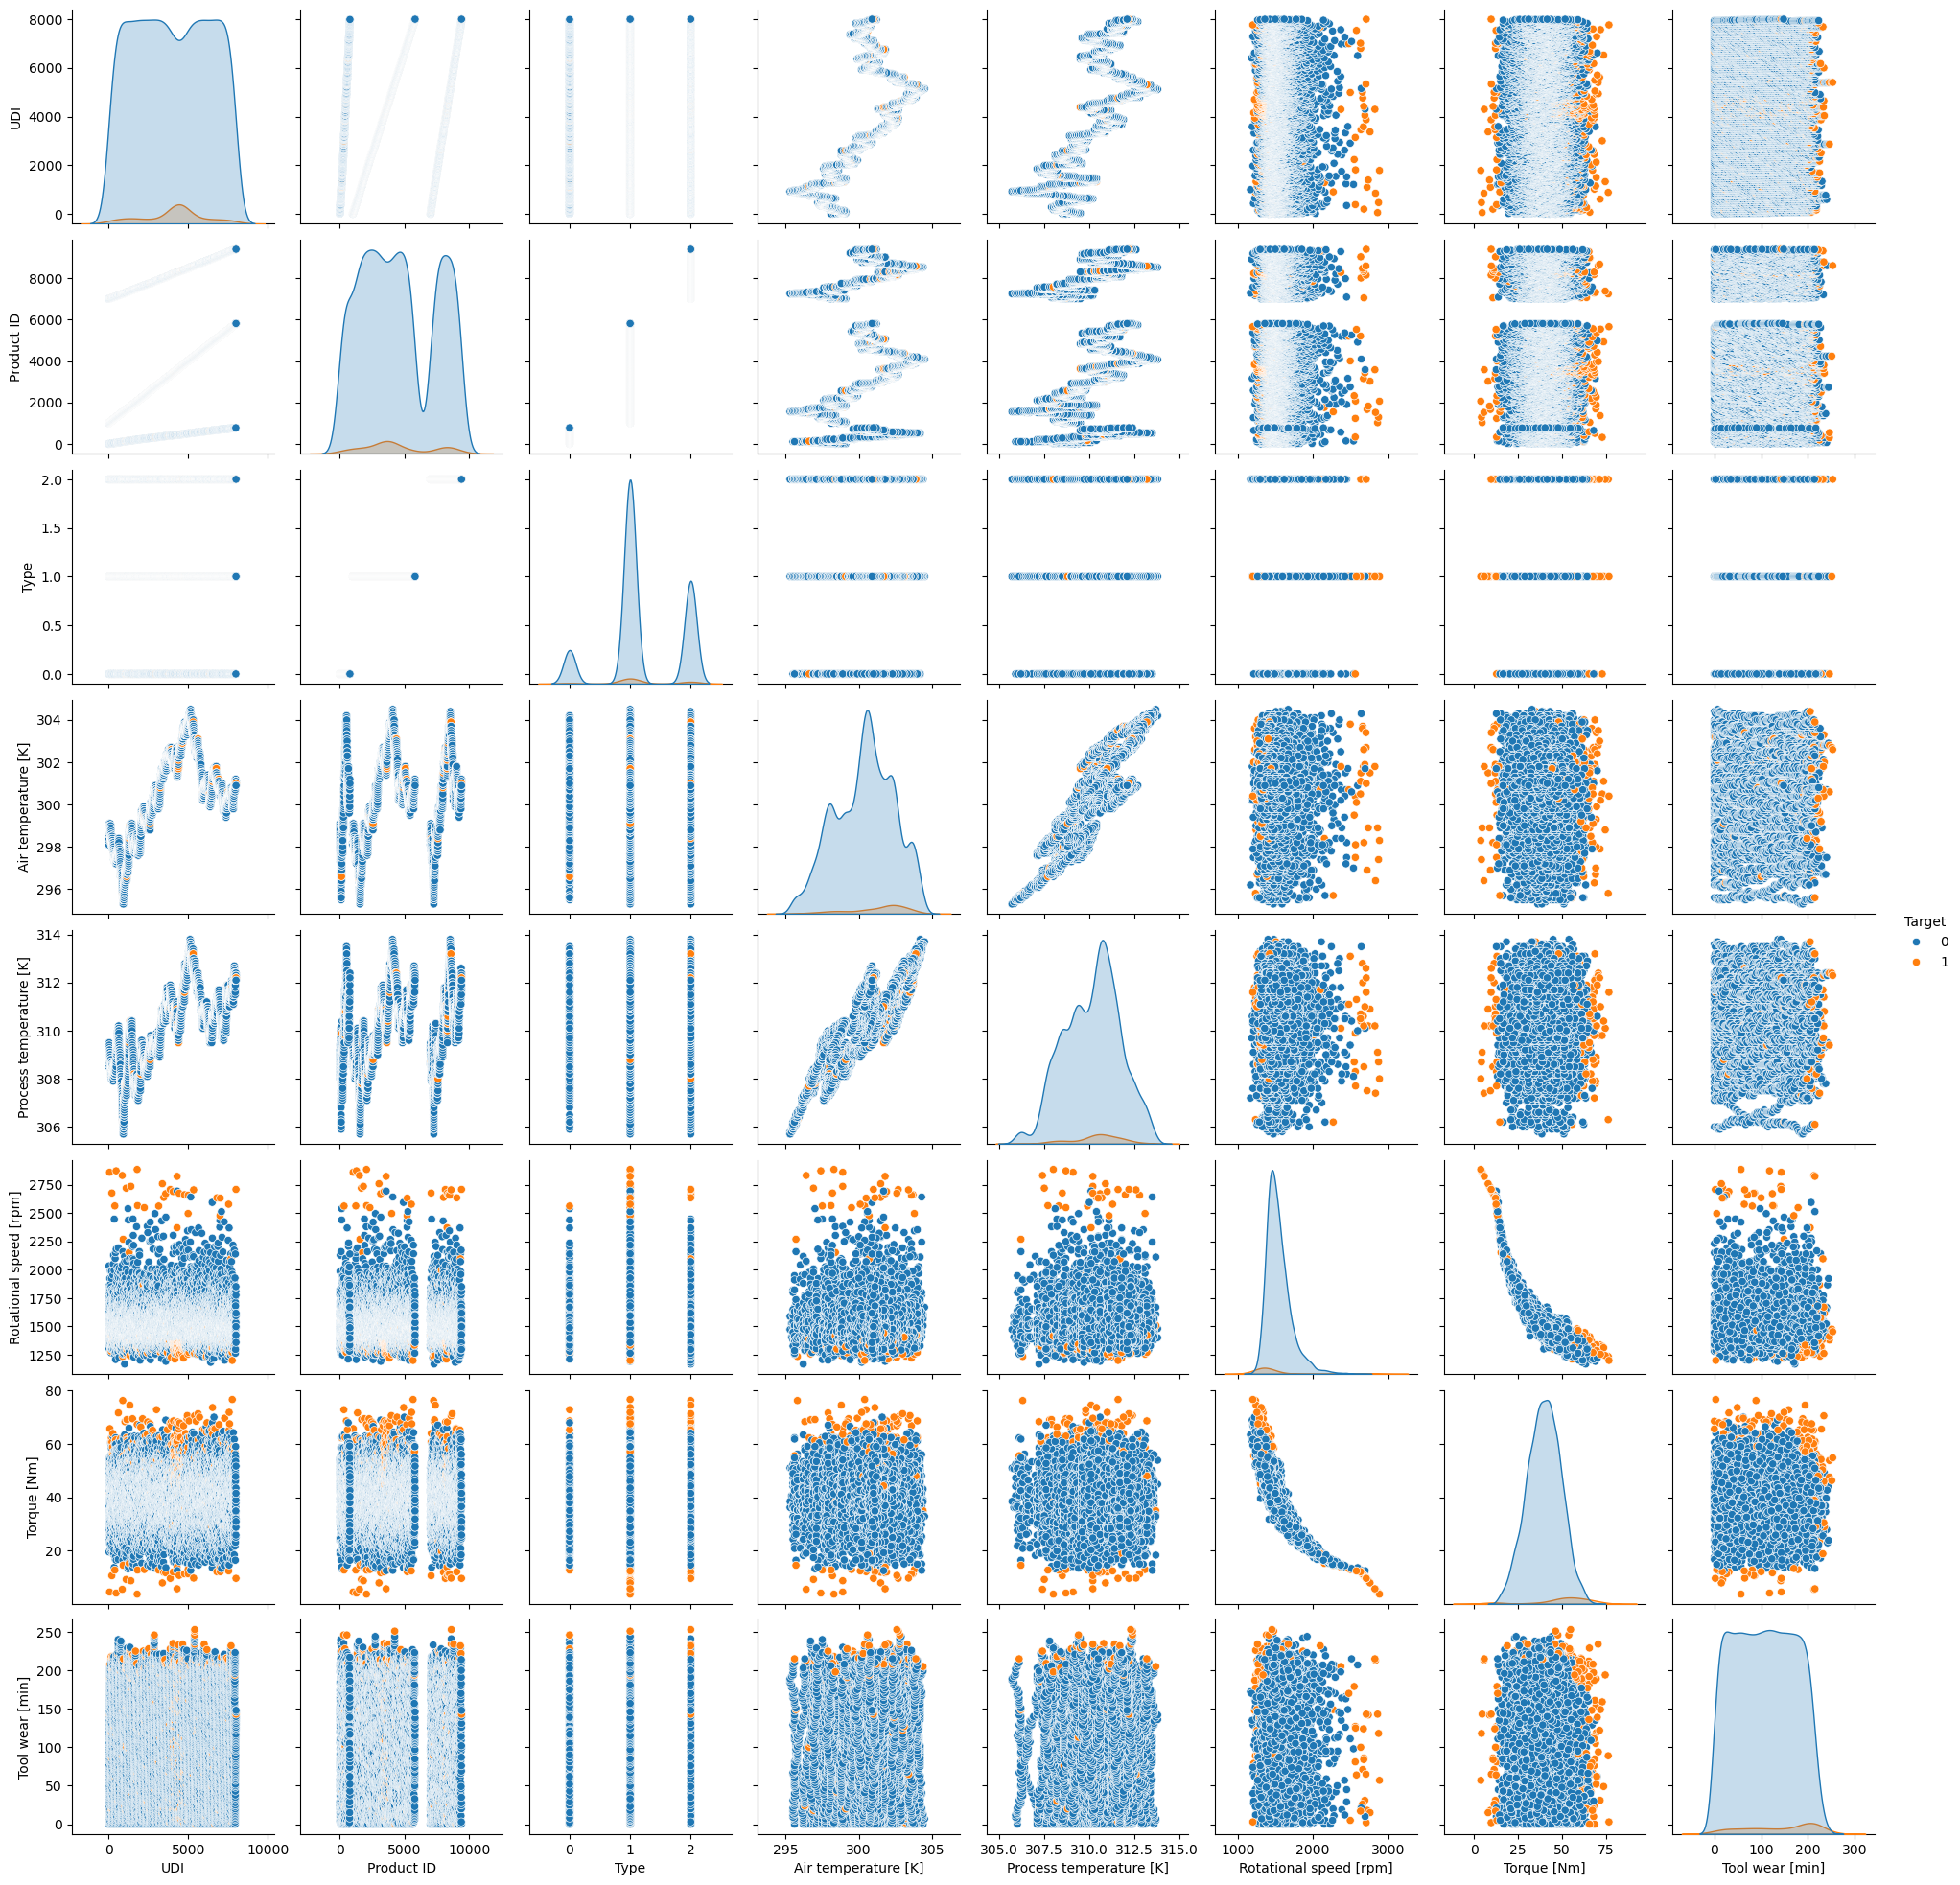

In [9]:
sns.pairplot(train_df,hue="Target")
plt.show()

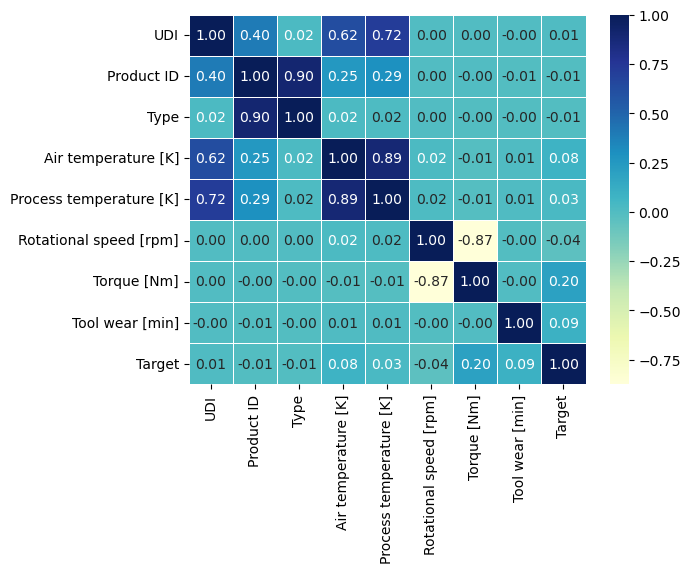

In [10]:
sns.heatmap(train_df.corr(),
            annot=True,
            cmap="YlGnBu",
            linewidths=0.5,
            fmt="0.2f");

## Modelling

### Let us try 4 models:
1. KNN
2. LogisticRegression
3. RandomForestClassifier
4. DecisionTreeClassifier

![](./ml_map.svg)

In [11]:
x_train=train_df.drop(["Target"],axis=1)
y_train=train_df.Target
x_test=test_df.drop(["Target"],axis=1)
y_test=test_df.Target

### 1. KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
knn_model.score(x_train,y_train)

0.978125

In [13]:
knn_model.score(x_test,y_test)

0.9805

### 2. LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)
lr_model.score(x_train,y_train)

0.967

In [15]:
lr_model.score(x_test,y_test)

0.9815

### 3. RandomForestClassifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_jobs=-1,
                                random_state=41)
rf_model.fit(x_train,y_train)
rf_model.score(x_train,y_train)

1.0

In [17]:
rf_model.score(x_test,y_test)

0.9855

### 4. DecisionTreeClassifier

In [18]:
from sklearn.tree import DecisionTreeClassifier as dft
df_model=dft(random_state=41)
df_model.fit(x_train,y_train)
df_model.score(x_train,y_train)

1.0

In [19]:
df_model.score(x_test,y_test)

0.9765

**Hence, as per the results obtained, we'll proceed with using RandomForestClassifier.**